In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.spatial import KDTree
from matplotlib.ticker import AutoMinorLocator
from scipy import stats

In [2]:
#define global parameters
path = "F:/DEND/results/"

In [3]:
#PV-IN DENSITY ANALYSIS

In [10]:
#combine results files into one csv
dataframes = []
for i in os.listdir(path):
    df=pd.read_csv(path + i)
    dataframes.append(df)

#print(dataframes)
result = pd.concat(dataframes)
result.to_csv(path + "complete.csv")
#for j in range()
print(result)
#df = pd.read_csv(path)

                               Label     Area       XM       YM
0    1  1312_1_1_fused.tif:1180-0795  177.672   84.816   22.515
1    2  1312_1_1_fused.tif:1180-0795  129.681  161.546  123.437
2    3  1312_1_1_fused.tif:1180-0795  424.723  197.375  167.945
3    4  1312_1_1_fused.tif:1180-0795  351.484  202.222  192.356
4    5  1312_1_1_fused.tif:1180-0795  390.503  188.000  216.840
..  ..                           ...      ...      ...      ...
11  12  1323_4_4_fused.tif:1039-0991  161.501  384.860  543.149
12  13  1323_4_4_fused.tif:1039-0991  244.234  526.934  595.701
13  14  1323_4_4_fused.tif:1039-0991  126.655  406.483  604.647
14  15  1323_4_4_fused.tif:1039-0991   62.910  385.505  609.880
15  16  1323_4_4_fused.tif:1039-0991  159.310  450.869  644.822

[2422 rows x 5 columns]


In [11]:
#change the label column to the first 8 characters
df = pd.read_csv("F:/DEND/complete.csv")
df['Label'] = df['Label'].apply(lambda x: x[:8])
df.drop(df.columns[1], axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df.to_csv(path + "complete_label.csv")

In [14]:
#change label column for areas.csv
df2 = pd.read_csv("F:/DEND/areas.csv")
df2['Label'] = df2['Label'].apply(lambda x: x[:8])
df2.to_csv(path + "areas_label.csv")
print(df2)

             Label        Area
0      1  1312_1_1  142829.135
1      2  1312_1_4  111900.381
2      3  1312_2_1  123988.254
3      4  1312_2_2  128759.115
4      5  1312_2_3  127215.776
..   ...       ...         ...
136  137  1323_3_3  101591.840
137  138  1323_3_4  114755.762
138  139  1323_4_2  105766.461
139  140  1323_4_3  126115.940
140  141  1323_4_4  107338.908

[141 rows x 3 columns]


In [16]:
#extract number of cells per image, create new dataframe including selected area
df1 = pd.read_csv("F:/DEND/complete_label.csv")
df2 = pd.read_csv("F:/DEND/areas_label.csv")

cells=[]
area=[]
listofslices = []
density = []

for n in os.listdir(path):
    listofslices.append(n[:8])
#print(listofslices)

for i in range(len(listofslices)):
    #print(listofslices[i])
#    slice_no.append(i[:8])
    x = sum(df1['Label']==listofslices[i])
    cells.append(x)
    area.append(df2['Area'][i])
    y=10000*x/df2['Area'][i]
    density.append(y)
#print(cells)
#print(area)

final = pd.DataFrame({'slice':listofslices, 'no. of cells':cells, 'Area':area, 'cell density*10^4':density})
print(final)
final.to_csv(path + "df_for_dens.csv")
    #print(i[:8])
#print(sum(df['Level'] == 'Beginner'))

        slice  no. of cells        Area  cell density*10^4
0    1312_1_1            25  142829.135           1.750343
1    1312_1_4            23  111900.381           2.055400
2    1312_2_1            16  123988.254           1.290445
3    1312_2_2            23  128759.115           1.786281
4    1312_2_3            18  127215.776           1.414919
..        ...           ...         ...                ...
136  1323_3_3            22  101591.840           2.165528
137  1323_3_4            22  114755.762           1.917115
138  1323_4_2            20  105766.461           1.890959
139  1323_4_3            14  126115.940           1.110090
140  1323_4_4            16  107338.908           1.490606

[141 rows x 4 columns]


In [18]:
#use complete_label for NN analysis
df = pd.read_csv('F:/DEND/complete_label.csv')
grouped = df.groupby('Label')

# Initialize an empty DataFrame to store distances to nearest neighbors
nearest_neighbors = pd.DataFrame()

# Loop through each group (image)
for image_label, group in grouped:
    # Create KDTree 
    coordinates = group[['XM', 'YM']].values
    tree = KDTree(coordinates)
    
    # Query the KDTree to find distances to 6 nearest neighbors for each point
    distances, indices = tree.query(coordinates, k=6)
    
    # Store the distances to the nearest neighbors in a dataframe
    nearest_neighbors_image = pd.DataFrame({
        'Label': [image_label] * len(group),
        'XM': group['XM'],
        'YM': group['YM'],
        'nearest_neighbor_1': distances[:, 1],
        'nearest_neighbor_2': distances[:, 2],
        'nearest_neighbor_3': distances[:, 3],
        'nearest_neighbor_4': distances[:, 4],
        'nearest_neighbor_5': distances[:, 5]
        
    })
    
    # Append the distances for the current image to the overall dataframe
    nearest_neighbors = pd.concat([nearest_neighbors, nearest_neighbors_image], ignore_index=True)

print(nearest_neighbors)
nearest_neighbors.to_csv('F:/DEND/NN.csv')

         Label       XM       YM  nearest_neighbor_1  nearest_neighbor_2  \
0     1312_1_1   84.816   22.515          126.778322          183.900553   
1     1312_1_1  161.546  123.437           57.137372           80.027280   
2     1312_1_1  197.375  167.945           24.887554           49.785657   
3     1312_1_1  202.222  192.356           24.887554           28.314864   
4     1312_1_1  188.000  216.840           28.314864           32.329532   
...        ...      ...      ...                 ...                 ...   
2417  1323_4_4  384.860  543.149           23.259935           34.791123   
2418  1323_4_4  526.934  595.701           90.546987          120.782757   
2419  1323_4_4  406.483  604.647           21.620841           59.867751   
2420  1323_4_4  385.505  609.880           21.620841           66.734117   
2421  1323_4_4  450.869  644.822           59.867751           74.117446   

      nearest_neighbor_3  nearest_neighbor_4  nearest_neighbor_5  
0             206.47

In [ ]:
#create plots

In [23]:
#####SEPERATE GENOTYPES
df = pd.read_csv('F:\DEND\arbor\dataframes\analysis')
control=[1312,1314,1315,1316,1321,1323]
mutant=[1313,1317,1318,1319,1320,1322]
#moved=[129,132]
print(df)
#print(type(df['img'][0][:3]))
liste=[]
rows=np.linspace(0, df.shape[0]-1, df.shape[0])

for i in rows:
    if int(df['slice'][i][:4]) in mutant:
        liste.append(i)
        new=df.drop(liste)
#print(liste)
print(new)
new.to_csv('F:/DEND/dens_control.csv')

     Unnamed: 0     slice  no. of cells        Area  cell density*10^4
0             0  1312_1_1            25  142829.135           1.750343
1             1  1312_1_4            23  111900.381           2.055400
2             2  1312_2_1            16  123988.254           1.290445
3             3  1312_2_2            23  128759.115           1.786281
4             4  1312_2_3            18  127215.776           1.414919
..          ...       ...           ...         ...                ...
136         136  1323_3_3            22  101591.840           2.165528
137         137  1323_3_4            22  114755.762           1.917115
138         138  1323_4_2            20  105766.461           1.890959
139         139  1323_4_3            14  126115.940           1.110090
140         140  1323_4_4            16  107338.908           1.490606

[141 rows x 5 columns]
     Unnamed: 0     slice  no. of cells        Area  cell density*10^4
0             0  1312_1_1            25  142829.135  

In [4]:
#PV-IN DENDRITIC BRANCH ANALYSIS
path = "F:/DEND/arbor/traces/analysis/"

In [22]:
#combine branch properties files
df = pd.read_csv(path + "1611_1_1_1/CSV_Properties.csv")
complete = pd.DataFrame()
for n in os.listdir(path):
    df = pd.read_csv(path + n + '/CSV_Properties.csv')
    df['label']= n 
    df.drop(['SWCType', 'PathLengthUnits', 'StartX', 'StartY', 'StartZ', 'EndX', 'EndY',
             'EndZ', 'ApproximateFittedVolume'], axis=1, inplace=True)
    complete = pd.concat([complete, df], ignore_index=True)
    #print(df)
complete.to_csv(path + 'complete.csv')

In [46]:
#adjust and combine sholl analysis files
#df = pd.read_csv(path + "1611_1_1_1/Sholl_Table-1.csv")
complete = pd.DataFrame()
for n in os.listdir(path):
    df = pd.read_csv(path + n + '/Sholl_Table-1.csv')
    soma = df.at[0, 'Radius']
    df['Radius'] = df['Radius'] - soma
    df['label']= n 
    #df.drop(['Radius (Polyn. fit)', 'Inters. (Polyn. fit)', 'log(Radius)', 'log(Inters. /Volume)'], axis=1, inplace=True)
    complete = pd.concat([complete, df], ignore_index=True)
    #print(df)
pixel_size=0.161
complete['Radius']=pixel_size*complete['Radius']
complete.to_csv(path + 'complete.csv')
print(df)

    Radius  Inters.  Radius (Polyn. fit)  Inters. (Polyn. fit)  log(Radius)  \
0      0.0      1.0                 30.0              1.000001     3.401197   
1     30.0      5.0                 60.0              5.000001     4.094345   
2     60.0      5.0                 90.0              5.000000     4.499810   
3     90.0      7.0                120.0              7.000000     4.787492   
4    120.0      6.0                150.0              6.000000     5.010635   
5    150.0      5.0                180.0              5.000000     5.192957   
6    180.0      5.0                210.0              5.000002     5.347108   
7    210.0      5.0                240.0              5.000002     5.480639   
8    240.0      5.0                270.0              5.000007     5.598422   
9    270.0      5.0                300.0              5.000026     5.703782   
10   300.0      4.0                330.0              4.000081     5.799093   
11   330.0      5.0                360.0            

In [8]:
# adjust and combine strahler analysis files
#df = pd.read_excel("F:\\DEND\\arbor\\traces\\analysis\\1611_1_1_1\\strahler.xlsx")

complete = pd.DataFrame()
for n in os.listdir(path):
    df = pd.read_excel(path + n + "\\strahler.xlsx", header=None)
    df.columns = ['Cell', 'Root Strahler no.', 'Avg. bif. ratio', 
              'Order:Measurement Pairs: Length(sum)',
              'Order:Measurement Pairs: No. of branches',
              'Order:Measurement Pairs: Bifurcation ratio',
              'Order:Measurement Pairs: Avg. contraction',
              'Order:Measurement Pairs: Avg. fragmentation'] 
    df['label']= n 
    #df.drop(['Radius (Polyn. fit)', 'Inters. (Polyn. fit)', 'log(Radius)', 'log(Inters. /Volume)'], axis=1, inplace=True)
    complete = pd.concat([complete, df], ignore_index=True)
    #print(df)
print(complete)
complete.to_excel(path + 'complete.xlsx')
print(df)


                           Cell  Root Strahler no. Avg. bif. ratio  \
0     Cell 1 rooted in Path (1)                  2               2   
1     Cell 2 rooted in Path (6)                  2             1,5   
2    Cell 3 rooted in Path (11)                  1               �   
3    Cell 4 rooted in Path (12)                  1               �   
4    Cell 5 rooted in Path (13)                  1               �   
..                          ...                ...             ...   
696   Cell 2 rooted in Path (2)                  1               �   
697   Cell 3 rooted in Path (3)                  1               �   
698   Cell 4 rooted in Path (4)                  2               2   
699   Cell 5 rooted in Path (7)                  2               2   
700  Cell 6 rooted in Path (10)                  2               2   

    Order:Measurement Pairs: Length(sum)  \
0                   1:1269,674; 2:597,55   
1                  1:897,607; 2:1070,937   
2                          

In [4]:
#isolate primary path length before splitting
pixel_size=0.161
df = pd.read_csv("F:/DEND/arbor/dataframes/properties.csv")
#print(df)
df_filtered = df[(df['PrimaryPath'] != False) & ~(df['PrimaryPath'] == True & df['ChildPathIDs'].isnull())]
#print(df_filtered)
df_filtered = df_filtered.drop(columns=['Unnamed: 0', 'PrimaryPath', 'StartsOnPath', 'ConnectedPathIDs',
                                        'ChildPathIDs', 'PathName'])
df_filtered['PathLength'] = df_filtered['PathLength'] * pixel_size
print(df_filtered)
df_filtered.to_csv("F:/DEND/arbor/dataframes/analysis/primary_path_length.csv")


# and no. of primary paths (total) in df
df1 = pd.read_csv("F:/DEND/arbor/dataframes/properties.csv")
df2 = df1[(df1['PrimaryPath'] != False)]
#print(df2)
grouped_df = df2.groupby('label').size().reset_index(name='no. of paths')
print(grouped_df)
grouped_df.to_csv("F:/DEND/arbor/dataframes/analysis/no. of paths.csv")

      PathID  PathLength       label
0          1   84.398694  1611_1_1_1
5          6   21.180424  1611_1_1_1
15         1   30.421883  1611_1_1_2
21         7   60.696351  1611_1_1_2
26         1   55.619455  1611_1_1_3
...      ...         ...         ...
1853       1   41.571825  1619_3_3_1
1860       8   21.178226  1619_3_3_1
1870       4   74.141838  1619_3_3_2
1873       7   12.136050  1619_3_3_2
1876      10   68.327255  1619_3_3_2

[343 rows x 3 columns]
          label  no. of paths
0    1611_1_1_1             7
1    1611_1_1_2             4
2    1611_1_1_3             5
3    1611_1_2_1             4
4    1611_1_2_2             7
..          ...           ...
142  1619_3_1_2             3
143  1619_3_2_1             6
144  1619_3_2_2             4
145  1619_3_3_1             6
146  1619_3_3_2             6

[147 rows x 2 columns]


In [2]:
####isolate avg bifurcation ratio
df = pd.read_excel("F:/DEND/arbor/dataframes/strahler.xlsx")
#print(df)
df = df.drop(columns=['Unnamed: 0', 'Order:Measurement Pairs: Length(sum)', 
                      'Order:Measurement Pairs: Bifurcation ratio',
                      'Order:Measurement Pairs: Avg. contraction', 
                      'Order:Measurement Pairs: Avg. fragmentation'])
df2 = df[(df['Root Strahler no.'] != 1)]

liste=[]
for i in df2['Avg. bif. ratio']:
    i = str(i).replace(',', '.')
    if float(i) > 10:
        n=float(i)/1000
        liste.append(n)
    else:
        liste.append(i)

df3 = df2.drop(columns=['Avg. bif. ratio'])
df3['average bifurcation ratio']=liste

#df3.to_csv("F:/DEND/arbor/dataframes/analysis/strahler_bif_rat.csv")
#print(df2)

####and branches order 1 of branched paths
print(df2)
df4 = df2.drop(columns=['Root Strahler no.', 'Avg. bif. ratio'])

liste2=[]
for j in df4['Order:Measurement Pairs: No. of branches']:
    liste2.append(j[7])

df4 = df4.drop(columns=['Order:Measurement Pairs: No. of branches'])
df4['no. of branches']=liste2

df4.to_csv("F:/DEND/arbor/dataframes/analysis/strahler_order2_no.csv")
#print(df4)

                           Cell  Root Strahler no. Avg. bif. ratio  \
0     Cell 1 rooted in Path (1)                  2               2   
1     Cell 2 rooted in Path (6)                  2             1,5   
7     Cell 1 rooted in Path (1)                  2               2   
8     Cell 2 rooted in Path (7)                  2               2   
11    Cell 1 rooted in Path (1)                  2             1,5   
..                          ...                ...             ...   
689   Cell 1 rooted in Path (1)                  2             1,5   
692   Cell 4 rooted in Path (8)                  2             1,5   
698   Cell 4 rooted in Path (4)                  2               2   
699   Cell 5 rooted in Path (7)                  2               2   
700  Cell 6 rooted in Path (10)                  2               2   

    Order:Measurement Pairs: No. of branches       label  
0                                   1:4; 2:2  1611_1_1_1  
1                                   1:3; 

In [11]:
####make table for total fragmentation
df = pd.read_excel("F:/DEND/arbor/dataframes/strahler.xlsx")

#print(df)
x = df['Order:Measurement Pairs: Length(sum)'][1]
x = str(x).replace(',', '.')
#print(x)

liste=[]
for i in df['Order:Measurement Pairs: Length(sum)']:
    #print(i)
    i = str(i).replace(',', '.')
    liste.append(i)

df['Length(sum)']=liste

df = df.drop(columns=['Unnamed: 0', 'Order:Measurement Pairs: Avg. fragmentation', 
                      'Order:Measurement Pairs: Bifurcation ratio',
                      'Order:Measurement Pairs: Avg. contraction',
                      'Avg. bif. ratio',
                      'Order:Measurement Pairs: Length(sum)'])
    
print(df)

def calculate_ratio(row):
    lengths = row['Length(sum)'].split('; ')
    branches = row['Order:Measurement Pairs: No. of branches'].split('; ')
    
    sum_lengths = 0
    sum_branches = 0
    
    for length_pair, branch_pair in zip(lengths, branches):
        sum_lengths += sum(map(float, length_pair.split(':')[1].split(',')))
        sum_branches += sum(map(float, branch_pair.split(':')[1].split(',')))
    #print(sum_lengths)
    #print(sum_branches)
    pixel_size=0.161
    #if sum_branches>1:
    #    return sum_lengths*pixel_size / (sum_branches-1)
    return sum_lengths*pixel_size / sum_branches-

df['Total frag ratio'] = df.apply(calculate_ratio, axis=1)
#df.dropna(subset=['Total frag ratio'], inplace=True)
#print(df['Ratio'].tolist())
print(df)

df.to_csv("F:/DEND/arbor/dataframes/analysis/modified fragmentation.csv")
#print(df)

                           Cell  Root Strahler no.  \
0     Cell 1 rooted in Path (1)                  2   
1     Cell 2 rooted in Path (6)                  2   
2    Cell 3 rooted in Path (11)                  1   
3    Cell 4 rooted in Path (12)                  1   
4    Cell 5 rooted in Path (13)                  1   
..                          ...                ...   
696   Cell 2 rooted in Path (2)                  1   
697   Cell 3 rooted in Path (3)                  1   
698   Cell 4 rooted in Path (4)                  2   
699   Cell 5 rooted in Path (7)                  2   
700  Cell 6 rooted in Path (10)                  2   

    Order:Measurement Pairs: No. of branches       label  \
0                                   1:4; 2:2  1611_1_1_1   
1                                   1:3; 2:2  1611_1_1_1   
2                                   01:01:00  1611_1_1_1   
3                                   01:01:00  1611_1_1_1   
4                                   01:01:00  1611_

In [12]:
#####SEPERATE GENOTYPES FOR WHOLE DIRECTORY
mutant_labels = ['1612', '1613', '1614']
control_labels = ['1611', '1616', '1617', '1618', '1619']

directory = "F:/DEND/arbor/dataframes/analysis"

csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

for file in csv_files:
    df = pd.read_csv(os.path.join(directory, file))
    
    mutant_df = df[df['label'].str[:4].isin(mutant_labels)]
    control_df = df[df['label'].str[:4].isin(control_labels)]

    mutant_df.to_csv(os.path.join(directory, f'{os.path.splitext(file)[0]}_mutant.csv'), index=False)
    control_df.to_csv(os.path.join(directory, f'{os.path.splitext(file)[0]}_control.csv'), index=False)

The distributions are not significantly different (fail to reject the null hypothesis)
Kolmogorov-Smirnov test statistic: 0.125
P-value: 0.9188052214121167


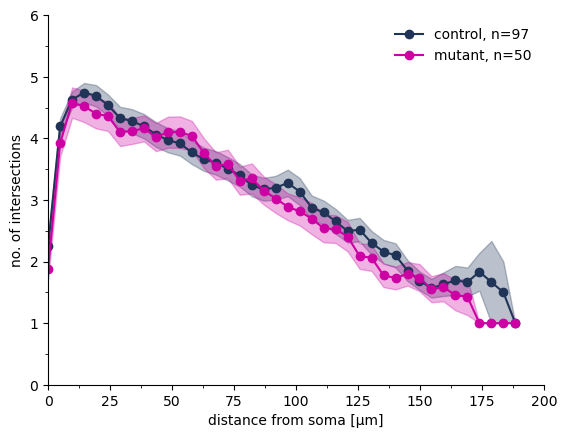

In [27]:
#create plot for sholl analysis
df1 = pd.read_csv("F:/DEND/arbor/dataframes/analysis/mutant control/sholl_mutant.csv")
#print(df1)
n_mutant = df1['label'].nunique()
#print(n_mutant)
df2 = pd.read_csv("F:/DEND/arbor/dataframes/analysis/mutant control/sholl_control.csv")
n_control = df2['label'].nunique()
#print(n_control)
    
mutant = df1.groupby('Radius')['Inters.'].mean().reset_index()
mutant.rename(columns={'Inters.': 'Avg. Inters.'}, inplace=True)
liste = df1.groupby('Radius')['Inters.'].sem().reset_index()
liste.rename(columns={'Inters.': 'Error'}, inplace=True)
mutant = pd.merge(mutant, liste[['Radius', 'Error']], on='Radius', how='left')
#print(df_merged)
#mutant.to_excel("F:/DEND/arbor/dataframes/sholl_mutant.xlsx")


control = df2.groupby('Radius')['Inters.'].mean().reset_index()
control.rename(columns={'Inters.': 'Avg. Inters.'}, inplace=True)
liste2 = df2.groupby('Radius')['Inters.'].sem().reset_index()
liste2.rename(columns={'Inters.': 'Error'}, inplace=True)
control = pd.merge(control, liste2[['Radius', 'Error']], on='Radius', how='left')
#control.to_excel("F:/DEND/arbor/dataframes/sholl_control.xlsx")

control_inters = control['Avg. Inters.']
mutant_inters = mutant['Avg. Inters.']

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(control_inters, mutant_inters)

# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05
if p_value < significance_level:
    print("The distributions are significantly different (reject the null hypothesis)")
else:
    print("The distributions are not significantly different (fail to reject the null hypothesis)")

print("Kolmogorov-Smirnov test statistic:", ks_statistic)
print("P-value:", p_value)

#make plot
fig = plt.figure()
ax = fig.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(control['Radius'], control['Avg. Inters.'], 'o-', color='#1F3457', alpha=1, label='control')
plt.plot(mutant['Radius'], mutant['Avg. Inters.'], 'o-', color='#CC00A3', alpha=1, label='mutant')

#plt.errorbar(df_merged2['Radius'], df_merged2['Avg. Inters.'], yerr=df_merged2['Error'], fmt='o-', color='#1F3457', label='control')
#plt.errorbar(df_merged['Radius'], df_merged['Avg. Inters.'], yerr=df_merged['Error'], fmt='o-', color='#CC00A3', label='mutant')
#plt.text(0.82, 0.8, '', fontsize=11, ha='center', va='center',
#         transform=plt.gca().transAxes)
plt.fill_between(control['Radius'], 
                 control['Avg. Inters.'] - control['Error'], 
                 control['Avg. Inters.'] + control['Error'], 
                 color=(31/255, 52/255, 87/255, 0.3))

# Error shading for mutant data
plt.fill_between(mutant['Radius'], 
                 mutant['Avg. Inters.'] - mutant['Error'], 
                 mutant['Avg. Inters.'] + mutant['Error'], 
                 color=(204/255, 0/255, 163/255, 0.3))
plt.ylim(0, 6)
plt.xlim(0, 200)
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.xlabel('distance from soma [μm]')
plt.ylabel('no. of intersections')
plt.legend(['control, n='+ str(n_control), 'mutant, n='+ str(n_mutant)], frameon=False)

#fig.show()

fig.savefig('F:/DEND/arbor/dataframes/analysis/mutant control/sholl.svg', format='svg')
